In [123]:
import pandas as pd

housing=pd.read_csv('train.csv',index_col='Id')
test=pd.read_csv('test.csv',index_col='Id')
print(housing.shape)

housing.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
X=housing.copy()
y=X.pop('SalePrice')

categorical_features=X.columns[X.dtypes=='object']
numerical_features=X.columns.drop(categorical_features)

In [43]:
print(X[categorical_features].isnull().sum().sort_values(ascending=0))
#all missing category should be filled with None here since nothing indicate this is due to missing data

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
Electrical          1
KitchenQual         0
CentralAir          0
Functional          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64


In [69]:
print(X[categorical_features].nunique().sort_values(ascending=0))
Ordinal_features=['Neighborhood','Exterior2nd','Exterior1st']
OH_features=categorical_features.drop(Ordinal_features)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
MasVnrType        3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64


In [48]:
print(X[numerical_features].isnull().sum().sort_values(ascending=0))
#again not due to missing data so fill with 0

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
WoodDeckSF         0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
MSSubClass         0
HalfBath           0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
OpenPorchSF        0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
BsmtFinSF1         0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64


In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn.impute import SimpleImputer

Ordinal_transform=Pipeline(steps=[
    ('Impute',SimpleImputer(strategy='constant')),
    ('Encode',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=1000))
])

OH_transform=Pipeline(steps=[
    ('Impute',SimpleImputer(strategy='constant')),
    ('Encode',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

Numerical_transform=Pipeline(steps=[
    ('Impute',SimpleImputer(strategy='constant',fill_value=0))
])

print(OH_transform.fit_transform(X[OH_features]))

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [109]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

preprocessor=ColumnTransformer(transformers=[
    ('Ordinal Categorical',Ordinal_transform,Ordinal_features),
    ('OH Category',OH_transform,OH_features),
    ('Numerical',Numerical_transform,numerical_features)
])



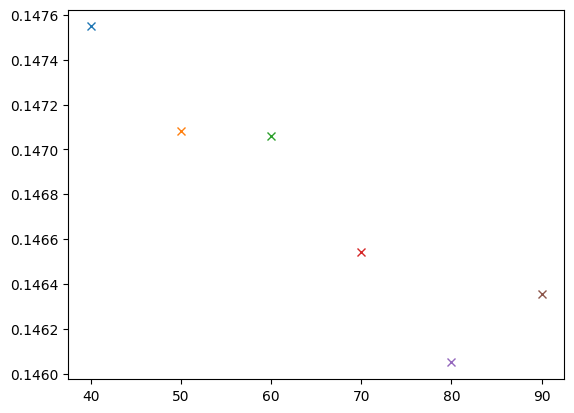

In [129]:
import numpy as np
for i in range(40,100,10):
    model=RandomForestRegressor(random_state=np.random.randint(1),n_estimators=i)

    pipeline=Pipeline(steps=[
        ('preprocessing',preprocessor),
        ('model',model)
    ])

    def get_scores(X,y):
        return -1*cross_val_score(pipeline,X,y,cv=5,scoring='neg_root_mean_squared_log_error')


    plt.plot(i,get_scores(X,y).mean(),'x')
plt.show()

In [124]:
preprocessor=ColumnTransformer(transformers=[
    ('Ordinal Categorical',Ordinal_transform,Ordinal_features),
    ('OH Category',OH_transform,OH_features),
    ('Numerical',Numerical_transform,numerical_features)
])

model=RandomForestRegressor(random_state=69,n_estimators=70)

X_processed=preprocessor.fit_transform(X)
test_processed=preprocessor.transform(test)

model.fit(X_processed,y)

final=pd.DataFrame(model.predict(test_processed),columns=['SalePrice'],index=test.index)

final.to_csv('submission.csv')